## Análise exploratória de dados do ENEM 2022
Neste notebook, realizarei a análise exploratória dos microdados do ENEM 2022.
O objetivo consiste em desvendar padrões e insights sobre aspectos socioeconômicos e educacionais do Brasil e do exame, que tem papel imprescindível na sociedade.
Para isso, técnicas de análise, exploração, limpeza e visualização de dados serão aplicadas.
Irei realizar duas análises, sob perspectivas diferentes.

* Para a primeira e principal delas, a métrica em foco será a nota geral, que consiste na média das notas nas 5 provas - Linguagens, Ciências Humanas, Ciências da Natureza, Matemática e Redação. Portanto, serão utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo. Irei nomeá-la de Análise de Desempenho.
* Para a segunda análise, serão analisados fatores que influenciam a ausência (estudantes com nota nula) do candidato na prova. Portanto, serão utilizados dados de todos os candidatos, dando foco aos que estavam ausentes. Irei nomeá-la de Análise de Abstenção.

Perguntas respondidas na Análise de Desempenho:

* Quem apresenta melhor desempenho, pessoas do sexo masculino ou feminino?
* Existem diferenças no desempenho para pessoas de diferentes faixas etárias?
* Em média, quais os estados com as maiores e as menores notas gerais?
* Como a renda influencia o desempenho do candidato?
* Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
* De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho do candidato?
* De que forma o tipo de escola (pública ou privada) influencia o desempenho do candidato?
* Existe alguma correlação entre o número de pessoas em casa e a nota geral do candidato?
* Perguntas respondidas na Análise de Abstenção:
* A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?
* A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?
* A renda familiar mensal influencia a ausência do candidato na prova?
* Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?
* Existe alguma diferença na taxa de abstenção entre pessoas do sexo masculino e do sexo feminino?
* Existe alguma diferença na taxa de abstenção entre alunos de escola pública e privada?
* Quais regiões apresentam as maiores e as menores taxas de abstenção?



Sobre os microdados:

Os microdados se constituem no menor nível de desagregação de dados recolhidos por pesquisas, avaliações e exames realizados. No caso do ENEM, os dados estão por participante. Nunca constaram nos dados divulgados quaisquer variáveis que permitissem a identificação direta do participante, tais como nome, logradouro do endereço, e-mail, número do CPF, data de nascimento, dentre outras. Inclusive, o próprio número de inscrição real do participante é substituído por uma máscara gerada sequencialmente. Tratam-se, portanto, de dados anonimizados.

In [3]:
import sys
import os


# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

# Adiciona a pasta raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Utils.
from src.eda_utils import *

# Visualize all the columns.
pd.set_option('display.max_columns', None)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
VERMELHO_FORTE = '#461220'
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

In [4]:
# Read the memory optimized data.
path = 'D:\DataScience - Enem\Dataset\clean_df.parquet'
df = pd.read_parquet(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927146 entries, 0 to 3927145
Data columns (total 30 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   faixa_etaria                   category
 1   sexo                           category
 2   estado_civil                   category
 3   status_conclusao_ensino_medio  category
 4   escola                         category
 5   treineiro                      category
 6   municipio_prova                object  
 7   uf_prova                       category
 8   presenca_cn                    category
 9   presenca_ch                    category
 10  presenca_lc                    category
 11  presenca_mt                    category
 12  nota_cn                        float32 
 13  nota_ch                        float32 
 14  nota_lc                        float32 
 15  nota_mt                        float32 
 16  lingua                         category
 17  nota_comp1                 

## 3. Análise exploratória de dados

* Irei explorar os dados, a fim de obter insights educacionais e socioeconômicos no contexto do maior exame de admissão em universidades do Brasil. Desse modo, análises univariada, bivariada e multivariada serão realizadas.
* Para realizar a Análise de Desempenho, dado que a minha principal métrica será a nota média geral, irei separar os dados dos estudantes que estavam presentes em ambos os dias de prova. Aqueles que faltaram os dois dias ou um dia (com nota nula) iriam afetar medidas como a média e distribuições, introduzindo distorções nas estatísticas e desviando o foco.
   * Para realizar a Análise de Desempenho, irei criar uma variável que informa a nota média geral no exame para cada candidato. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados.
* Para realizar a Análise de Abstenção, dado que o objetivo consiste em identificar os fatores que influenciam a ausência do estudante nos dias de prova, serão utilizados todos os dados disponíveis.
   * Para realizar a Análise de Abstenção, irei criar uma variável que informa se o candidato estava presente nos dois dias de prova. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados.

In [5]:
# Obtain all candidates data for absence analysis.
absent_df = df.copy()

# Create a column indicating wheter the student was present in both days of the exam.
absent_df['presente'] = (absent_df['presenca_lc'] == 'Presente') & \
                        (absent_df['presenca_ch'] == 'Presente') & \
                        (absent_df['presenca_cn'] == 'Presente') & \
                        (absent_df['presenca_mt'] == 'Presente')

# Obtain data containing just candidates who were present in both days for performance analysis.
performance_df = df.loc[(df['presenca_cn'] == 'Presente') & \
                        (df['presenca_mt'] == 'Presente') & \
                        (df['presenca_lc'] == 'Presente') & \
                        (df['presenca_ch'] == 'Presente')]

# Create average grade variable.
performance_df['nota_media'] = (performance_df['nota_lc'] + \
                                performance_df['nota_ch'] + \
                                performance_df['nota_cn'] + \
                                performance_df['nota_mt'] + \
                                performance_df['nota_redacao']) / 5

3.1 Variáveis numéricas e categóricas
* Irei acessar quais são as variáveis numéricas e categóricas a priori, para ter um senso de quais visualizações e abordagens de análise escolher, além de formular perguntas a serem feitas aos dados.
* Irei acessar a cardinalidade de cada variável categórica. Este é um ponto importante, pois pode guiar possíveis ajustes e escolhas de visualizações.

In [6]:
categorical_features = df.select_dtypes('category').columns.to_list()
numerical_features = df.select_dtypes('number').columns.to_list()
print(f'Há {len(categorical_features)} variáveis categóricas. São elas: {categorical_features}')
print(f'Há {len(numerical_features)} variáveis numéricas. São elas: {numerical_features}')

Há 18 variáveis categóricas. São elas: ['faixa_etaria', 'sexo', 'estado_civil', 'status_conclusao_ensino_medio', 'escola', 'treineiro', 'uf_prova', 'presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt', 'lingua', 'escolaridade_pai', 'escolaridade_mae', 'renda_familiar_mensal', 'possui_celular_em_casa', 'possui_computador_em_casa', 'acesso_internet_em_casa']
Há 11 variáveis numéricas. São elas: ['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_comp1', 'nota_comp2', 'nota_comp3', 'nota_comp4', 'nota_comp5', 'nota_redacao', 'numero_pessoas_em_casa']


In [7]:
print('Cardinalidade das variáveis categóricas: ')
for feature in categorical_features:
    print(f'{feature} ({df[feature].nunique()})', end=', ')

Cardinalidade das variáveis categóricas: 
faixa_etaria (7), sexo (2), estado_civil (5), status_conclusao_ensino_medio (4), escola (3), treineiro (2), uf_prova (27), presenca_cn (2), presenca_ch (2), presenca_lc (2), presenca_mt (2), lingua (2), escolaridade_pai (7), escolaridade_mae (7), renda_familiar_mensal (10), possui_celular_em_casa (3), possui_computador_em_casa (3), acesso_internet_em_casa (2), 

* De forma geral, as variáveis categóricas apresentam baixa cardinalidade. Com exceção estado de realização da prova, que possui 27 domínios distintos.

4.1 Distribuições das variáveis demográficas

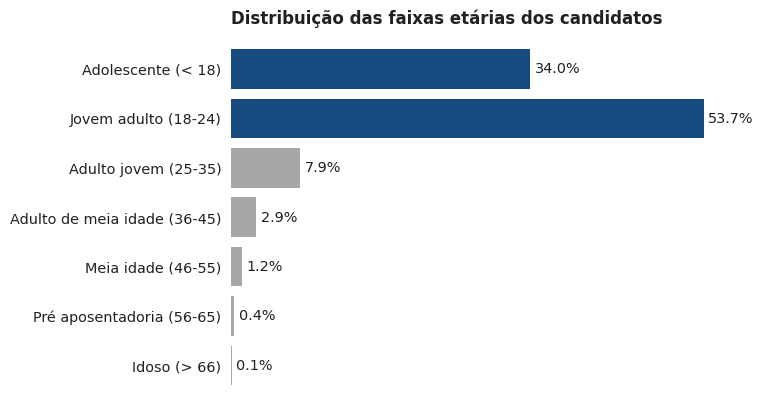

In [8]:
age_grouped = performance_df.groupby(['faixa_etaria'])[['faixa_etaria']].count().rename(columns={'faixa_etaria': 'count'}).reset_index()
age_grouped['pct'] = round(age_grouped['count'] / np.sum(age_grouped['count']) * 100, 2) 
age_grouped['limit_age'] = age_grouped['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grouped = age_grouped.sort_values(by=['limit_age'], ascending=False).reset_index(drop=True)

# Plot.
barh_plot(age_grouped, 'faixa_etaria', 'pct',
          'Distribuição das faixas etárias dos candidatos', 
          range(len(age_grouped)), figsize=(6.4, 4.8),
          bar_color=[CINZA8]*5 + 2*[AZUL1])

* É possível perceber que 87% dos candidatos têm até 24 anos, sendo adolescentes ou jovens adultos. Idosos e pessoas perto da idade de aposentadoria representam apenas 0.5% dessa população.

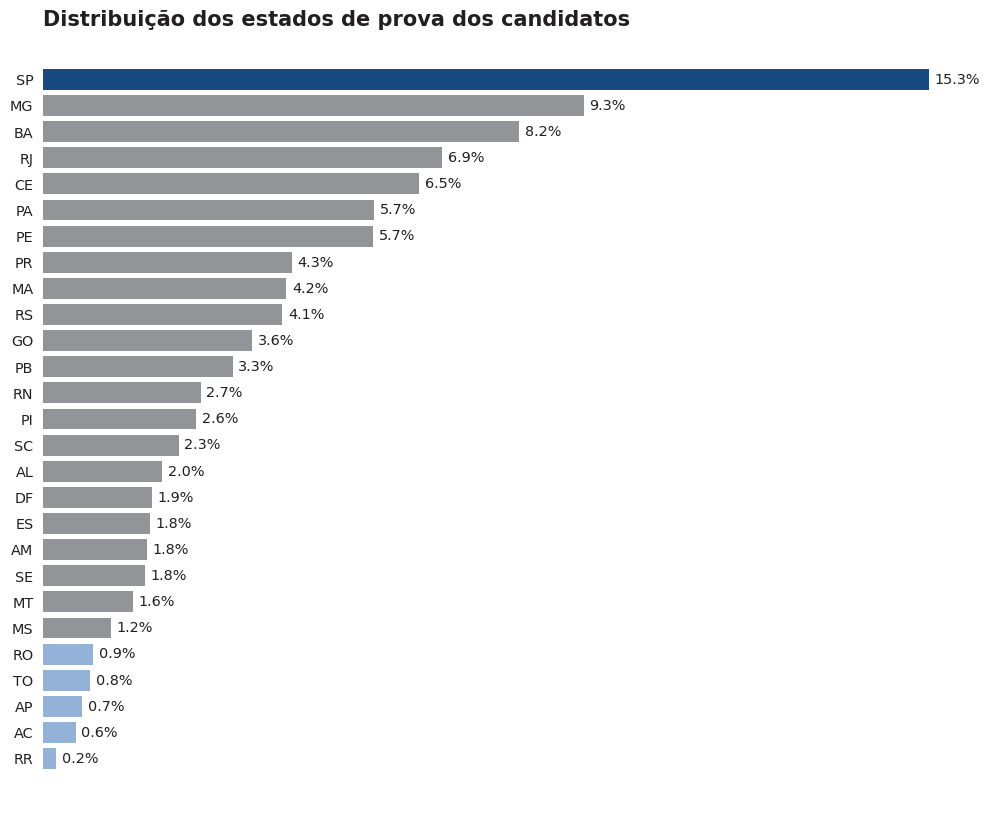

In [9]:
uf_grouped = performance_df.groupby(['uf_prova'])[['uf_prova']].count().rename(columns={'uf_prova': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
uf_grouped['pct'] = round(uf_grouped['count'] / np.sum(uf_grouped['count']) * 100, 2) 

barh_plot(uf_grouped, 'uf_prova', 'pct', 'Distribuição dos estados de prova dos candidatos',
          range(len(uf_grouped)), figsize=(12, 10), text_space=0.1, title_fontsize=15, invert_yaxis=True, bar_color=[AZUL1] + [CINZA7]*21 + [AZUL3]*5)

* É possível perceber que São Paulo é o estado com o maior número de candidatos, representando 15.3% do total, enquanto estados do norte, como RO, TO, AP, AC e RR não concentram nem 1% da população de candidatos cada.

In [10]:
(performance_df['escola'].value_counts(normalize=True) * 100).to_frame()

,proportion
escola,
Não respondeu,60.763465
Pública,30.972675
Privada,8.263860


In [11]:
(performance_df['estado_civil'].value_counts(normalize=True) * 100).to_frame()

,proportion
estado_civil,
Solteiro(a),91.147960
Não informado,3.889534
Casado(a)/União Estável,3.585793
Divorciado(a)/Separado(a),1.284750
Viúvo(a),0.091963


In [12]:
(performance_df['treineiro'].value_counts(normalize=True) * 100).to_frame()

,proportion
treineiro,
Não,80.904758
Sim,19.095242


In [13]:
(performance_df['numero_pessoas_em_casa'].value_counts(normalize=True) * 100).to_frame()

,proportion
numero_pessoas_em_casa,
4,33.752535
3,28.252592
5,14.612786
2,13.070369
6,4.731236
1,2.703057
7,1.663354
8,0.680030
9,0.253560


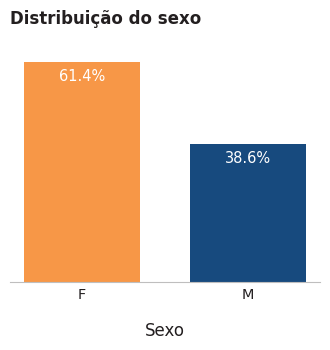

In [14]:
sex_grouped = performance_df.groupby(['sexo'])[['sexo']].count().rename(columns={'sexo': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
sex_grouped['pct'] = round(sex_grouped['count'] / np.sum(sex_grouped['count']) * 100, 2) 

bar_plot(sex_grouped, 'sexo', 'pct', 'Distribuição do sexo', 'Sexo', 
         figsize=(4, 3), title_pad=20, barwidth=0.7, 
         bar_color=[LARANJA1, AZUL1], invert_xaxis=False)

* 61% dos candidatos são mulheres, enquanto 39% são homens.

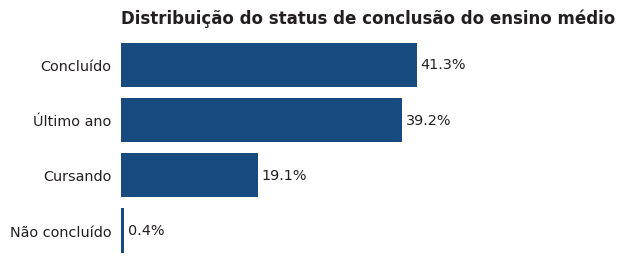

In [15]:
st_grouped = performance_df.groupby(['status_conclusao_ensino_medio'])[['status_conclusao_ensino_medio']].count().rename(columns={'status_conclusao_ensino_medio':'count'}).reset_index().sort_values(by=['count'], ascending=False)
st_grouped['pct'] = round(st_grouped['count'] / np.sum(st_grouped['count']) * 100,2)

barh_plot(st_grouped, 'status_conclusao_ensino_medio', 'pct', 
          title='Distribuição do status de conclusão do ensino médio', 
          ytick_range=(range(len(st_grouped))), invert_yaxis=True, figsize=(4, 3))

* Aproximadamente 80% dos candidatos já concluíram o ensino médio ou estão no último ano. Os 19.8% cursando representam treineiros, enquanto menos de 1% não concluíram nem estão cursando.

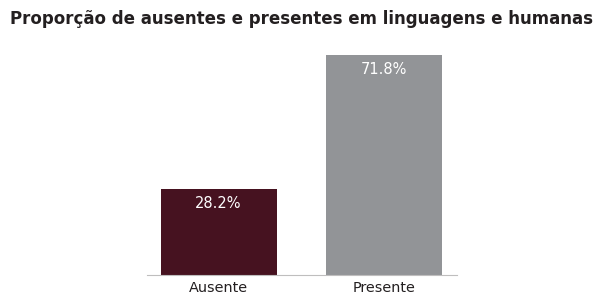

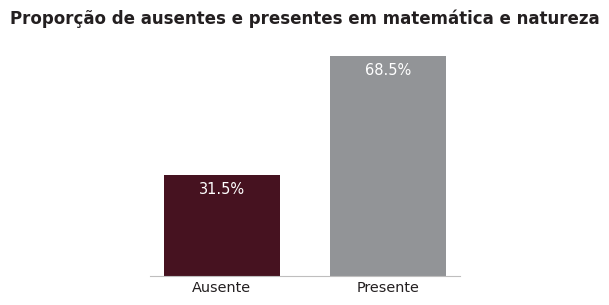

In [16]:
# Languages.
plc_grouped = absent_df.groupby(['presenca_lc'])[['presenca_lc']].count().rename(columns={'presenca_lc': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
plc_grouped['pct'] = round(plc_grouped['count'] / np.sum(plc_grouped['count']) * 100, 2) 

# Human sciences.
pch_grouped = absent_df.groupby(['presenca_ch'])[['presenca_ch']].count().rename(columns={'presenca_ch': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pch_grouped['pct'] = round(pch_grouped['count'] / np.sum(pch_grouped['count']) * 100, 2) 

# Math.
pmt_grouped = absent_df.groupby(['presenca_mt'])[['presenca_mt']].count().rename(columns={'presenca_mt': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pmt_grouped['pct'] = round(pmt_grouped['count'] / np.sum(pmt_grouped['count']) * 100, 2) 

# Nature sciences.
pcn_grouped = absent_df.groupby(['presenca_cn'])[['presenca_cn']].count().rename(columns={'presenca_cn': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pcn_grouped['pct'] = round(pcn_grouped['count'] / np.sum(pcn_grouped['count']) * 100, 2) 

bar_plot(plc_grouped, 'presenca_lc', 'pct', 
         title='Proporção de ausentes e presentes em linguagens e humanas',
         xlabel='', figsize=(4, 3), barwidth=0.7, bar_color=[CINZA7, VERMELHO_FORTE],
         title_pad=15, invert_xaxis=True, title_loc='center', label_size=12)

bar_plot(pmt_grouped, 'presenca_mt', 'pct', 
         title='Proporção de ausentes e presentes em matemática e natureza',
         xlabel='', figsize=(4, 3), barwidth=0.7, bar_color=[CINZA7, VERMELHO_FORTE],
         title_pad=15, invert_xaxis=True, title_loc='center', label_size=12)

* É possível perceber uma taxa de desistência 3% maior nas provas do segundo dia, totalizando 31.5% de candidatos que não foram. Isso pode indicar uma maior dificuldade dos estudantes em ciências exatas, as quais compõem as provas do segundo dia. De qualquer forma, ambos os dias apresentam uma alta taxa de desistência, o que é preocupante e revela como a educação brasileira ainda é precária. Há uma discrepância entre o nível do exame e o nível intelectual dos alunos. É provável que grande parte das desistências ocorram por despreparo/falta de confiança para realizar a prova e não por razões randômicas.

4.3 Distribuição das notas nas provas objetivas e na redação

In [17]:
performance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
nota_cn,2678264.0,495.912689,87.778030,0.0,440.600006,494.000000,551.299988,868.400024
nota_ch,2678264.0,526.204285,86.806290,0.0,471.200012,532.900024,586.900024,823.000000
nota_lc,2678264.0,520.297180,74.123169,0.0,473.700012,524.900024,571.799988,820.799988
nota_mt,2678264.0,534.026855,131.529236,0.0,431.399994,523.799988,630.299988,958.599976
nota_comp1,2678264.0,122.899529,34.296608,0.0,120.000000,120.000000,140.000000,200.000000
nota_comp2,2678264.0,141.217194,50.402664,0.0,120.000000,140.000000,180.000000,200.000000
nota_comp3,2678264.0,120.143044,42.408932,0.0,100.000000,120.000000,140.000000,200.000000
nota_comp4,2678264.0,131.522141,42.609047,0.0,120.000000,120.000000,160.000000,200.000000
nota_comp5,2678264.0,110.820038,61.017399,0.0,60.000000,120.000000,160.000000,200.000000
nota_redacao,2678264.0,626.601929,209.032059,0.0,520.000000,620.000000,780.000000,1000.000000


* A nota média geral para alunos que estavam presentes em ambos os dias é aproximadamente 540.
* A nota média máxima no ENEM de 2023 foi de aproximadamente 862.
* Analisando os percentis, metade dos alunos obtiveram uma nota de até 539, enquanto 75% obtiveram uma nota de até 606.
* A nota média em linguagens é aproximadamente 520. A nota média em ciências humanas é aproximadamente 526.
* Observando os percentis, metade dos candidatos obtém uma nota de até 524 em linguagens e 532 em ciências humanas.
* A nota média em ciências da natureza é aproximadamente 495. A nota média em matemática é aproximadamente 534.
Observando os percentis, metade dos candidatos obtém uma nota de até 494 em ciências da natureza e 523 em matemática.
* A nota média na redação é aproximadamente 626. Entretanto, esse valor pode variar bastante, com um desvio padrão de 209. Os candidatos tendem a performar melhor na competência 2, em relação às outras competências.
Analisando a mediana, metade dos candidatos obtiveram mais de 620 pontos na redação.
* Observando os valores máximos e mínimos, não há notas incoerentes.
* Alguns alunos têm nota média 0, representando o valor mínimo. Isso ocorre em situações em que o aluno foi realizar o exame, ou seja, estava presente, mas deixou o gabarito ou a redação em branco, por exemplo.
* Claramente, os alunos em geral não performam bem no exame e há uma distorção entre o nível do ENEM e o nível do que é ensinado nas escolas.

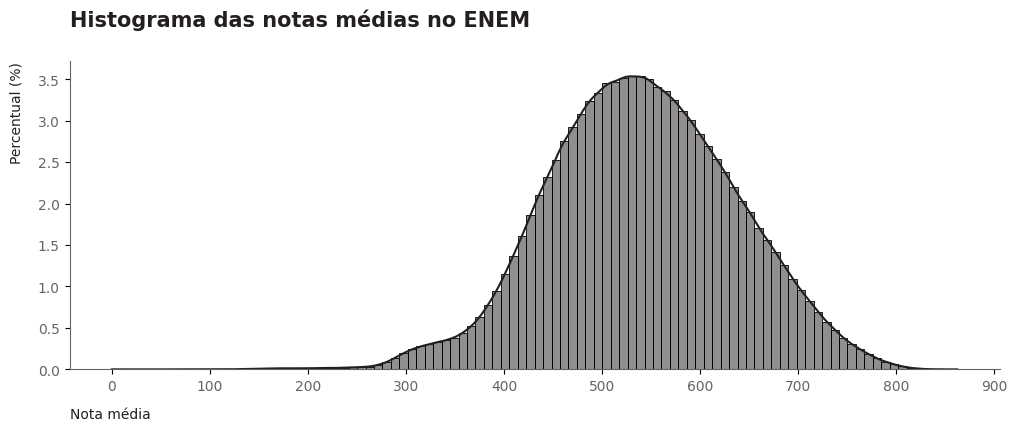

In [18]:
histogram_plot(performance_df, 'nota_media', 'Histograma das notas médias no ENEM',
               'Nota média', 'Percentual (%)', label_color=CINZA1, spines_ticks_colors=CINZA4, hist_color=CINZA1, 
               figsize=(12, 4), bins=100, title_pad=25, title_size=15, labelpad=10, kde=True)

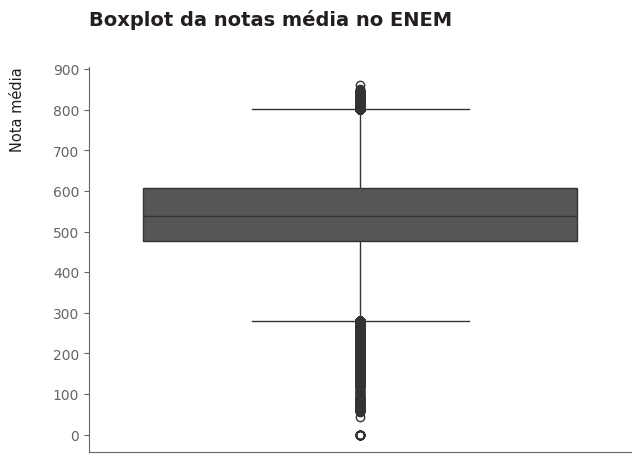

In [19]:
univariate_boxplot(performance_df, y='nota_media', xlabel='', ylabel='Nota média', title='Boxplot da notas média no ENEM', 
        figsize=(7, 5), xaxis=False, pad=30, boxplot_color=CINZA3, y_step=100, title_size=14, label_size=10.5, tick_size=10)

* Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo, e candidatos que gabaritam a prova, ficando com uma nota elevada. Portanto, outliers não serão removidos.

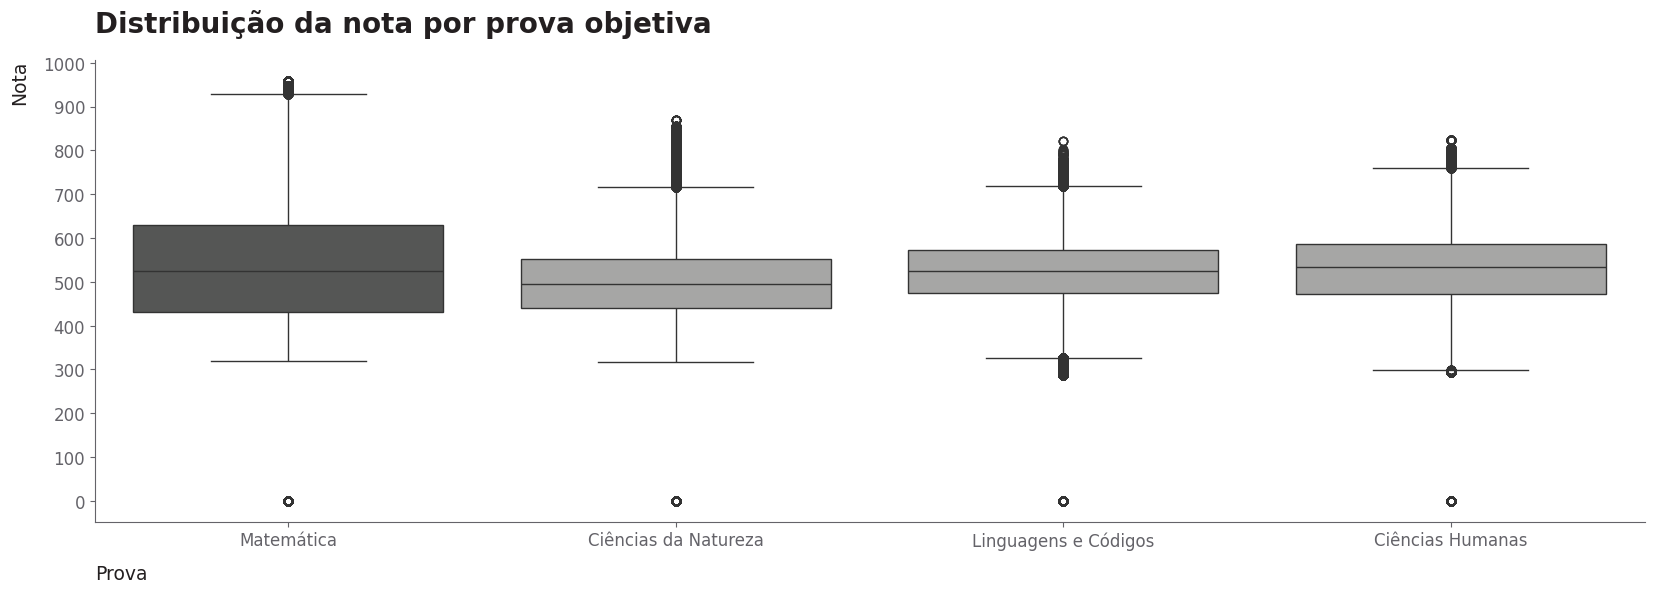

In [20]:
objective_exams = performance_df[['nota_mt', 'nota_cn', 'nota_lc', 'nota_ch']]

bivariate_boxplot(objective_exams, title='Distribuição da nota por prova objetiva', 
        xlabel='Prova', xtick_range=range(4), xtick_labels=['Matemática',
                                                            'Ciências da Natureza',
                                                            'Linguagens e Códigos', 
                                                            'Ciências Humanas'],
        ylabel='Nota', ytick_labels=range(0, 1001, 100), y_step=100, figsize=(20, 6), title_size=20, labelpad=10,
        label_size=13.5, tick_size=12, boxplot_palette=[CINZA3, CINZA8, CINZA8, CINZA8])

* Analisando as distribuições, os candidatos tendem a ir melhor nas provas do primeiro dia, sendo ciências da natureza a área do conhecimento em que é apresentado o pior desempenho. Matemática apresenta o melhor desempenho médio entre as provas. Entretanto, isso se deve ao modelo do ENEM, em que naturalmente essa área do conhecimento fornece uma nota maior aos candidatos. Isso pode ser verificado observando a nota máxima em matemática, que é consideravelmente maior em relação as outras.
* De forma geral, todas as notas apresentam outliers acima e abaixo dos limites superior e inferior. Entretanto, estes não representam informação incoerente, uma vez que naturalmente alguns candidatos irão tirar zero (apesar de estarem presentes, provavelmente esses candidatos deixaram o gabarito em branco, ou algo relacionado), enquanto outros irão gabaritar a prova, atingindo a nota máxima. Portanto, outliers não serão removidos.

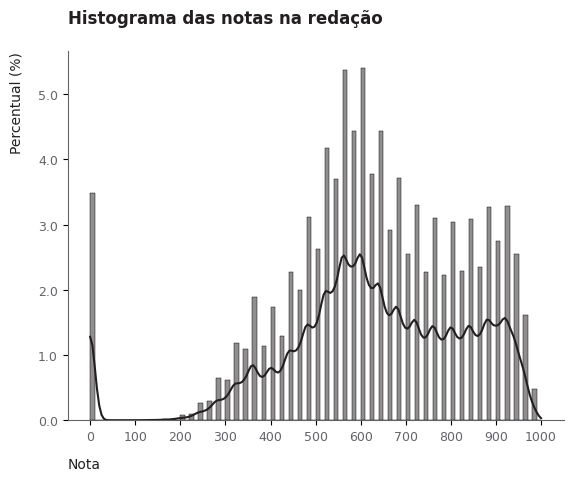

In [21]:
histogram_plot(performance_df, 'nota_redacao', title='Histograma das notas na redação',
               xlabel='Nota', ylabel='Percentual (%)', hist_color=CINZA1, labelpad=10,
               label_size=10, tick_size=9, bins=100)

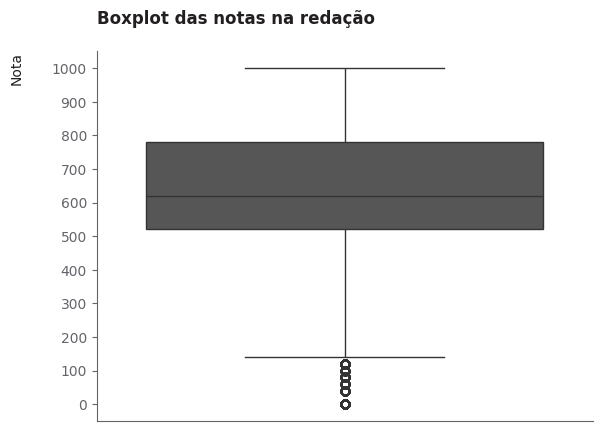

In [22]:
univariate_boxplot(performance_df, title='Boxplot das notas na redação', y='nota_redacao',
                   xlabel='', ylabel='Nota', xaxis=False, y_step=100, boxplot_color=CINZA3)

Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo e dos pontos citados acima. Portanto, outliers não serão removidos.

In [23]:
performance_df['lingua'].value_counts(normalize=True).to_frame() * 100

,proportion
lingua,
Inglês,57.756816
Espanhol,42.243184


* A maioria dos alunos escolhe o Inglês como língua estrangeira para realizar a prova.

4.4 Distribuição das variáveis socioeconômicas

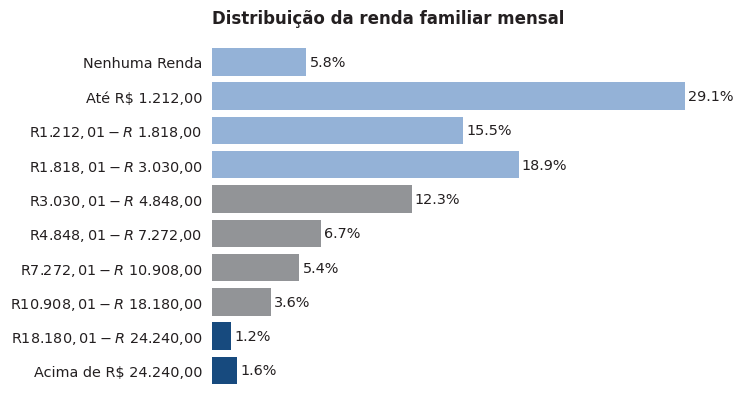

In [24]:
income_grouped = performance_df.groupby(['renda_familiar_mensal'])[['renda_familiar_mensal']].count().rename(columns={'renda_familiar_mensal': 'count'}).reset_index()
income_grouped['pct'] = round(income_grouped['count'] / np.sum(income_grouped['count']) * 100, 2) 
income_grouped['income_unique'] = income_grouped['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_grouped = income_grouped.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_grouped, 'renda_familiar_mensal', 'pct',
          'Distribuição da renda familiar mensal', 
          ytick_range=range(len(income_grouped)), invert_yaxis=True, text_space=0.2, bar_color=[AZUL3]*4 + [CINZA7]*4 + [AZUL1]*2)


* É possível perceber que 69,3% dos participantes possuem uma renda de até R$ 3.030,00, incluindo também aqueles que nao possuem nenhuma renda.

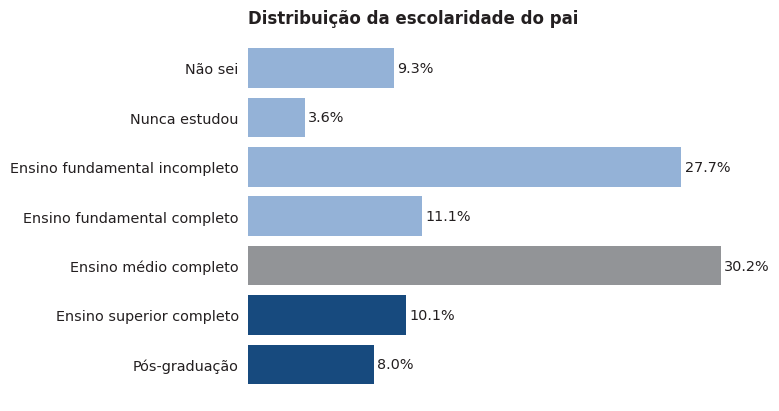

In [25]:
# Group the data by escolaridade pai.
esc_pai_grouped = performance_df.groupby(['escolaridade_pai'])[['escolaridade_pai']].count().rename(columns={'escolaridade_pai': 'count'}).reset_index()
esc_pai_grouped['pct'] = round(esc_pai_grouped['count'] / np.sum(esc_pai_grouped['count']) * 100, 2)
esc_pai_grouped['order_escolaridade'] = esc_pai_grouped['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_pai_grouped = esc_pai_grouped.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_pai_grouped, 'escolaridade_pai', 'pct',
          title='Distribuição da escolaridade do pai', ytick_range=range(len(esc_pai_grouped)),
          invert_yaxis=True, text_space=0.2, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

* É possível perceber que quase metade (42.4 %) dos pais dos candidatos não possuem ensino médio completo. Ademais, aproximadamente 19% chegaram a concluir o ensino superior. Chama a atenção o alto percentual de pais que não concluíram o ensino fundamental, representando 27.7% da amostra.

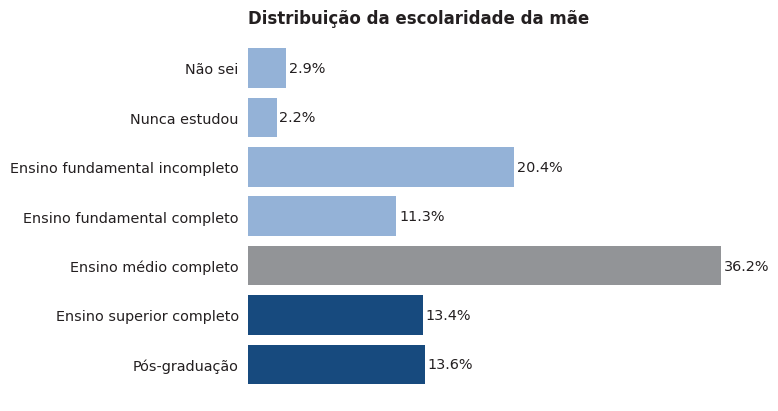

In [26]:
# Group the data by escolaridade pai.
esc_mae_grouped = performance_df.groupby(['escolaridade_mae'])[['escolaridade_mae']].count().rename(columns={'escolaridade_mae': 'count'}).reset_index()
esc_mae_grouped['pct'] = round(esc_mae_grouped['count'] / np.sum(esc_mae_grouped['count']) * 100, 2)
esc_mae_grouped['order_escolaridade'] = esc_mae_grouped['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_mae_grouped = esc_mae_grouped.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_mae_grouped, 'escolaridade_mae', 'pct',
          title='Distribuição da escolaridade da mãe', ytick_range=range(len(esc_mae_grouped)),
          invert_yaxis=True, text_space=0.2, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

* Da mesma maniera é possível perceber que 33 % das mães dos candidatos não possuem ensino médio completo. Ademais, aproximadamente 17% chegaram a concluir o ensino superior. 
* Novamente chama a atenção o alto percentual de mães que não concluíram o ensino fundamental, representando 20.4% da amostra.
* Entretanto, o nível de escolaridade das mães é claramente superior ao dos pais. Para elas, 27% chegaram a concluir o ensino superior, contra 18% para os pais, por exemplo.

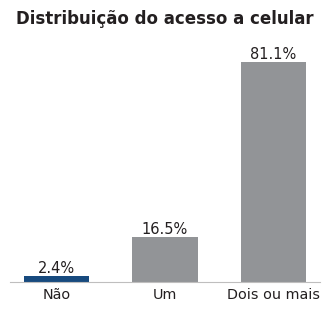

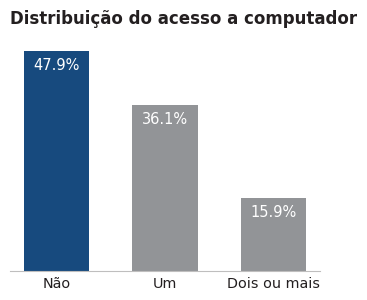

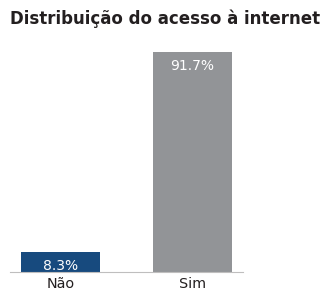

In [27]:
# Group the data by possui_celular_em_casa.
celular_grouped = performance_df.groupby(['possui_celular_em_casa'])[['possui_celular_em_casa']].count().rename(columns={'possui_celular_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
celular_grouped['pct'] = round(celular_grouped['count'] / np.sum(celular_grouped['count']) * 100, 2) 
celular_grouped = celular_grouped.sort_values(by=['pct'], ascending=True)

bar_plot(celular_grouped, 'possui_celular_em_casa', 'pct', 
         title='Distribuição do acesso a celular', xlabel='',
         figsize=(4, 3), top_annotation=True, title_pad=20,
         bar_color=[AZUL1, CINZA7, CINZA7], title_loc='center')

# Group the data by possui_computador_em_casa.
computador_grouped = performance_df.groupby(['possui_computador_em_casa'])[['possui_computador_em_casa']].count().rename(columns={'possui_computador_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
computador_grouped['pct'] = round(computador_grouped['count'] / np.sum(computador_grouped['count']) * 100, 2) 

bar_plot(computador_grouped, 'possui_computador_em_casa', 'pct', 
         title='Distribuição do acesso a computador', xlabel='',
         figsize=(4, 3), top_annotation=False, title_pad=12,
         bar_color=[AZUL1, CINZA7, CINZA7], title_loc='left', )

# Group the data by acesso_internet_em_casa.
internet_grouped = performance_df.groupby(['acesso_internet_em_casa'])[['acesso_internet_em_casa']].count().rename(columns={'acesso_internet_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
internet_grouped['pct'] = round(internet_grouped['count'] / np.sum(internet_grouped['count']) * 100, 2) 
internet_grouped = internet_grouped.sort_values(by=['pct'], ascending=True)

bar_plot(internet_grouped, 'acesso_internet_em_casa', 'pct', 
         title='Distribuição do acesso à internet', xlabel='',
         figsize=(3, 3), top_annotation=False, title_pad=12,
         bar_color=[AZUL1, CINZA7], title_loc='left', text_fontsize=10)

* Surpreendentemente, 47.9% dos candidatos não possuem computador em casa. Esse dado nos revela uma dificuldade e disparidade de condições dos estudantes, já que um computador com acesso a internet é a melhor ferramenta para estudos atualmente. Com isso, surge uma questão: **Será que há uma diferença significativa nas notas daqueles que possuem computador em casa em relação aos que não detêm esse bem?** 
* 81.1% dos candidatos possuem dois celulares ou mais em casa. Este é um bem mais acessível e portanto mais comum nas famílias.
* 91.7% dos candidatos possuem acesso a internet em casa. Embora seja um baixo percentual, ainda é alarmante o fato de que aproximadamente 8,3% dos estudantes não possuem sequer internet para se preparar. Considerando um exame desse porte, isso representa um grande número de pessoas.

## Análise de Desempenho
Entre os objetivos da Análise de Desmpenho estão, entender qual o perfil dos candidatos que obtêm determinados resultados, quais variáveis se relacionam com a nota geral e como estas poderiam impactar em uma futura tarefa de predição.

A métrica em foco será a nota geral, que consiste na média das notas nas 5 provas - Linguagens, Ciências Humanas, Ciências da Natureza, Matemática e Redação.
Portanto, serão utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo.

Perguntas respondidas na Análise de Desempenho:
   * Quem apresenta melhor desempenho, pessoas do sexo masculino ou feminino?
   * Existem diferenças no desempenho para pessoas de diferentes faixas etárias?
   * Em média, quais os estados com as maiores e as menores notas gerais?
   * Como a renda influencia o desempenho do candidato?
   * Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
   * De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho do candidato?
   * Existe alguma correlação entre o número de pessoas em casa e a nota geral do candidato?

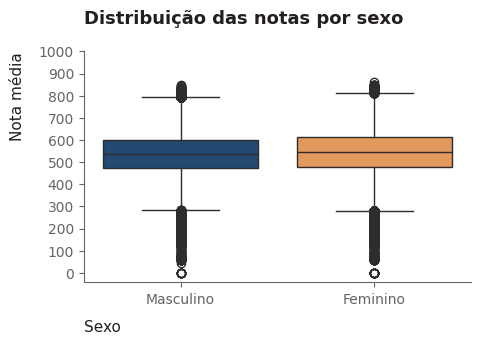

In [28]:
bivariate_boxplot(performance_df, title='Distribuição das notas por sexo', 
        xlabel='Sexo', xtick_range=range(2), xtick_labels=['Masculino', 'Feminino'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1, LARANJA1], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=11, tick_size=10, y='nota_media', x='sexo')

* Podemos observar pelo boxplot que pessoas do sexo masculino e feminino não apresentam diferenças significativas na nota obtida no ENEM.

## Existem diferenças no desempenho para pessoas de diferentes faixas etárias?


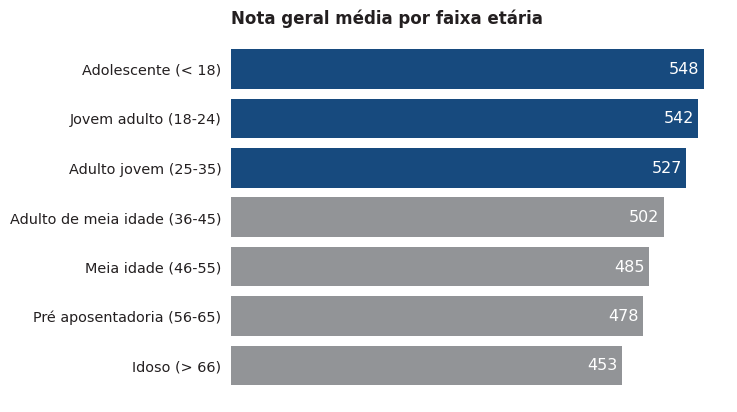

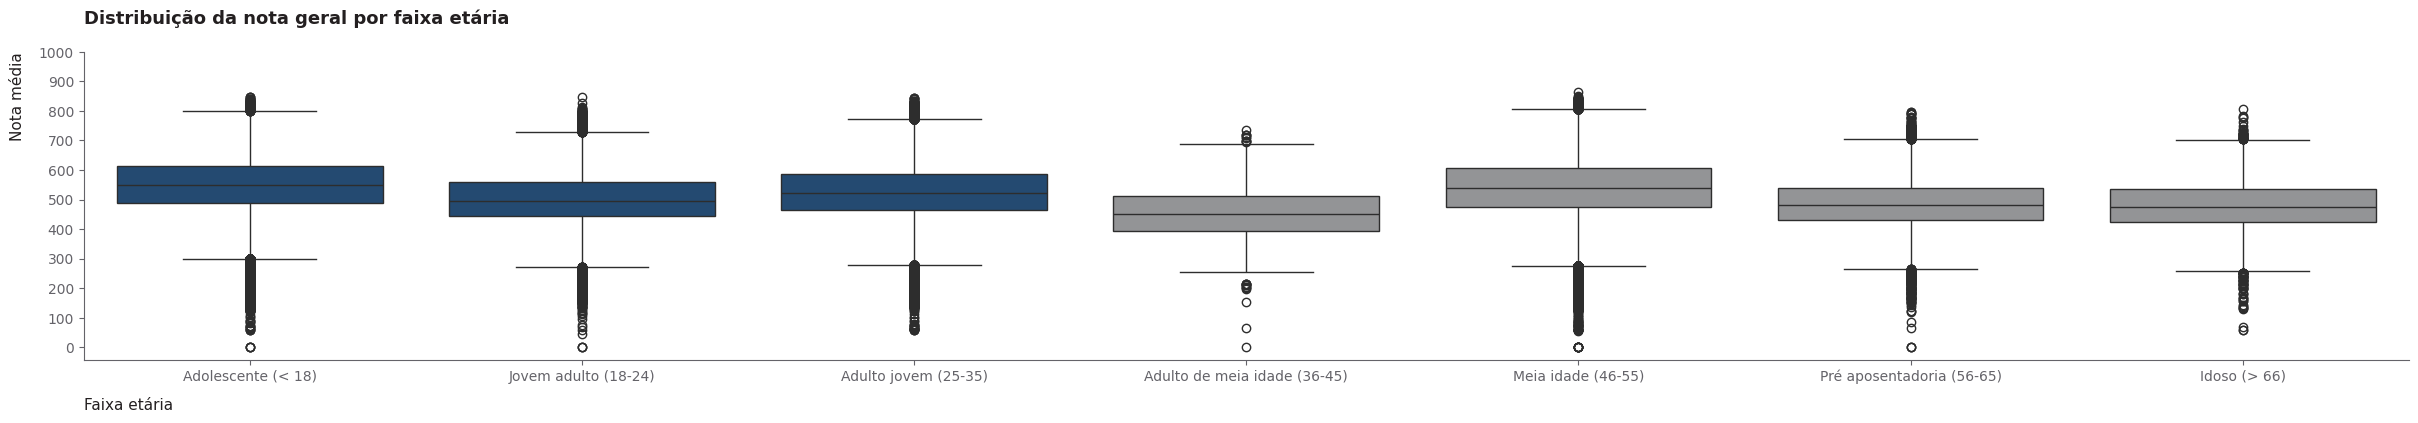

In [29]:
age_grade = performance_df.groupby(['faixa_etaria'])[['nota_media']].mean().reset_index()
age_grade['limit_age'] = age_grade['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grade = age_grade.sort_values(by=['limit_age'], ascending=True).reset_index(drop=True)

barh_plot(age_grade, 'faixa_etaria', 'nota_media',
          title='Nota geral média por faixa etária', ytick_range=range(len(age_grade)),
          invert_yaxis=True, text_space=-40, text_color=BRANCO, text_size=11.5, mean=True,
          bar_color=[AZUL1]*3 + [CINZA7]*4)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por faixa etária',  
                  xtick_labels=age_grade['faixa_etaria'].unique().tolist(),
                  xlabel='Faixa etária', xtick_range=range(len(age_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1]*3 + [CINZA7]*4,
                  figsize=(30, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='faixa_etaria')

* Em média, pessoas mais jovens tendem a apresentar uma nota geral maior que a de pessoas mais velhas.

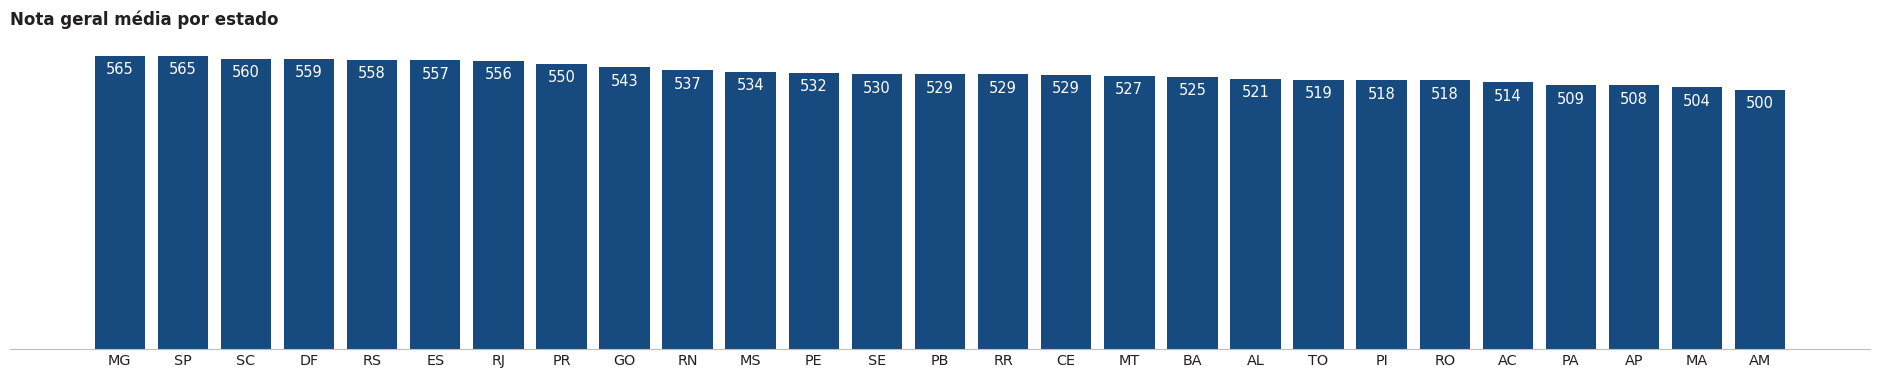

In [30]:
uf_grade = performance_df.groupby(['uf_prova'])[['nota_media']].mean().reset_index().sort_values(by=['nota_media'], ascending=False)

bar_plot(uf_grade, 'uf_prova', 'nota_media', 
         title='Nota geral média por estado', xlabel='',
         figsize=(24, 4), top_annotation=False, title_pad=12,
         bar_color=AZUL1, title_loc='left', barwidth=0.8, mean=True)

* Em média, estados do sul e sudeste possuem as maiores notas gerais. Com destaque para Minas Gerais e São Paulo, sendo os dois melhores nesse quesito. O Distrito Federal (Brasília) é a exceção dentre as outras regiões, estando em quarto lugar.

## A renda influencia na nota?

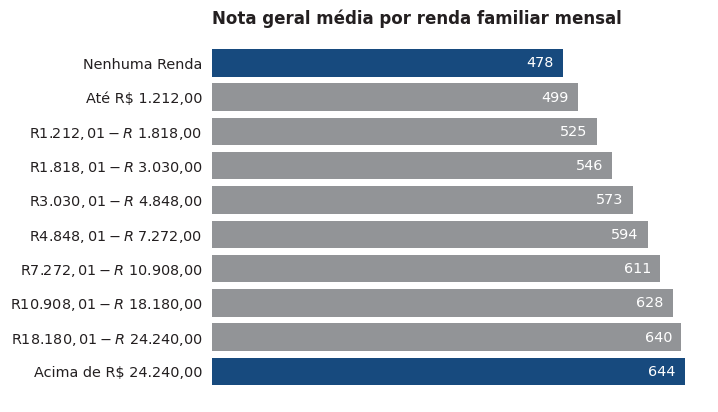

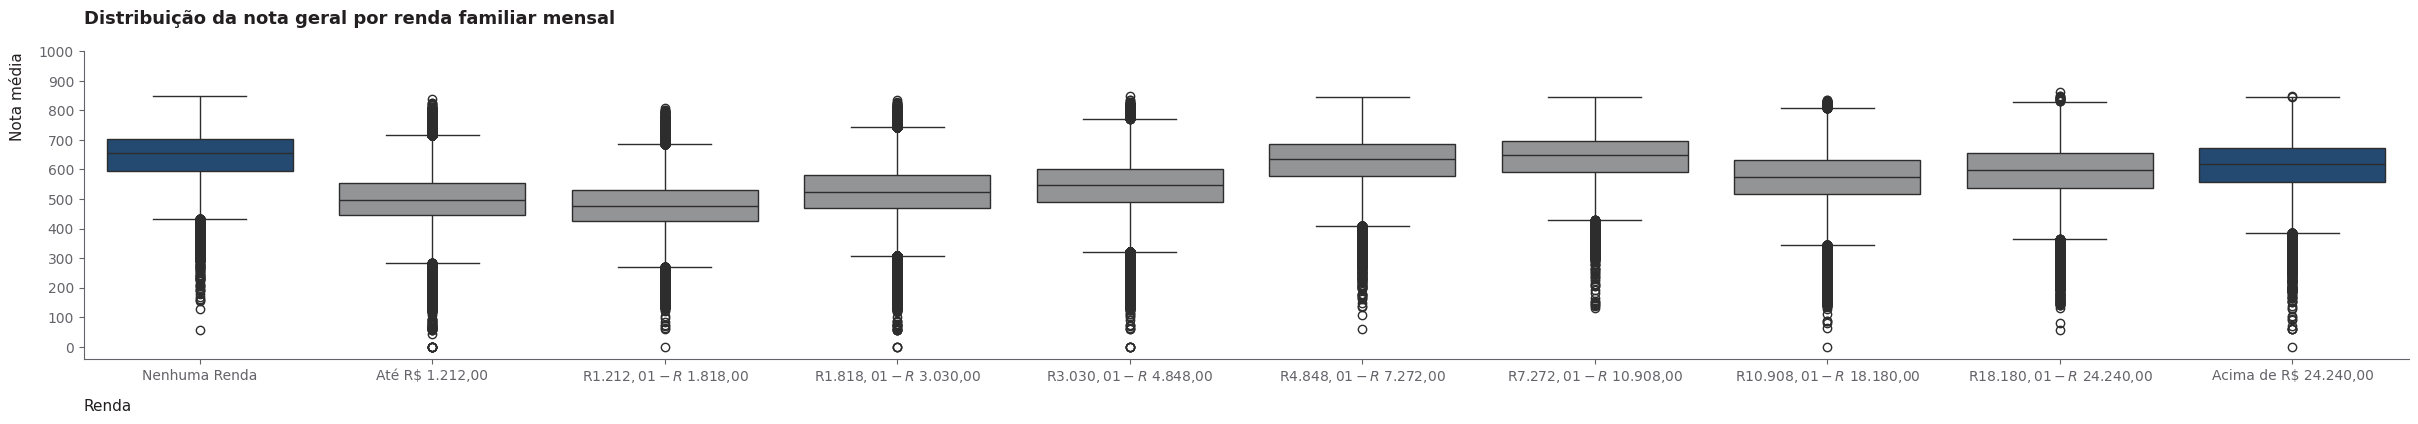

In [31]:
income_grade = performance_df.groupby(['renda_familiar_mensal'])[['nota_media']].mean().reset_index()
income_grade['income_unique'] = income_grade['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_grade = income_grade.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_grade, 'renda_familiar_mensal', 'nota_media',
          title='Nota geral média por renda familiar mensal', ytick_range=range(len(income_grade)),
          invert_yaxis=True, text_space=-50, text_color=BRANCO, mean=True, bar_color=[AZUL1] + [CINZA7]*8 + [AZUL1])


bivariate_boxplot(performance_df, title='Distribuição da nota geral por renda familiar mensal',  
                  xtick_labels=income_grade['renda_familiar_mensal'].unique().tolist(),
                  xlabel='Renda', xtick_range=range(len(income_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1] + [CINZA7]*8 + [AZUL1], figsize=(30, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='renda_familiar_mensal')

* É possível perceber que, em média, quanto maior a renda familiar mensal, maior a nota geral do candidato. Candidatos com renda acima de R$ 24.240,00 obtiveram uma nota geral com uma diferença absoluta de aproximadamente 166 pontos.

## Como a escolaridade do pai influencia na nota?

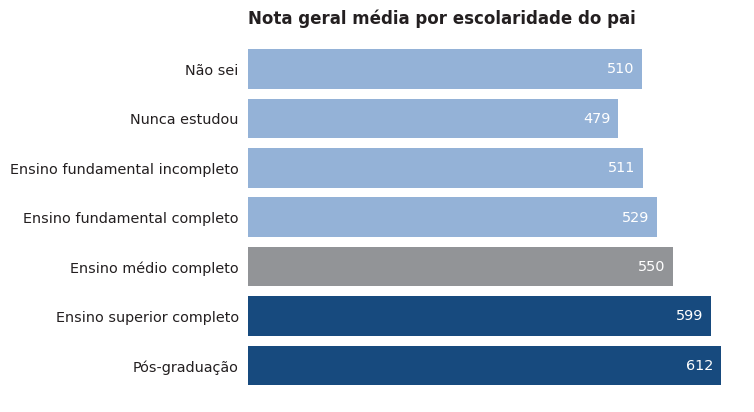

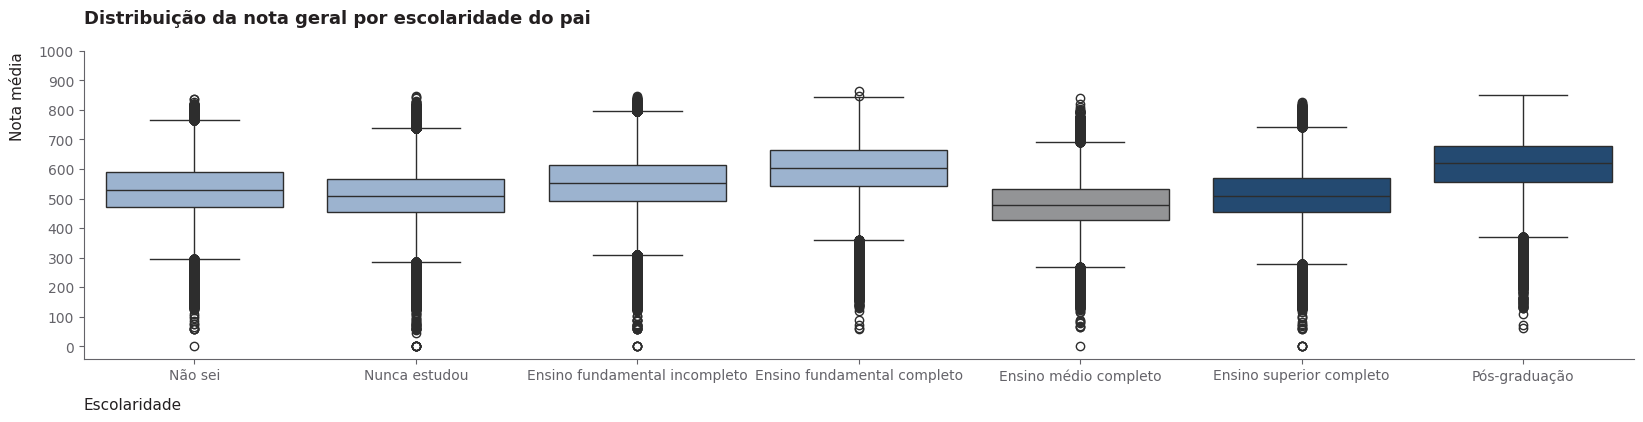

In [32]:
esc_pai_grade = performance_df.groupby(['escolaridade_pai'])[['nota_media']].mean().reset_index()
esc_pai_grade['order_escolaridade'] = esc_pai_grade['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_pai_grade = esc_pai_grade.sort_values(by=['order_escolaridade'], ascending=True)


barh_plot(esc_pai_grade, 'escolaridade_pai', 'nota_media',
          title='Nota geral média por escolaridade do pai', ytick_range=range(len(esc_pai_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por escolaridade do pai',  
                  xtick_labels=esc_pai_grade['escolaridade_pai'].unique().tolist(),
                  xlabel='Escolaridade', xtick_range=range(len(esc_pai_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3]*4 + [CINZA7] + [AZUL1]*2, figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='escolaridade_pai')

## Como a escolaridade da mãe influencia na nota?

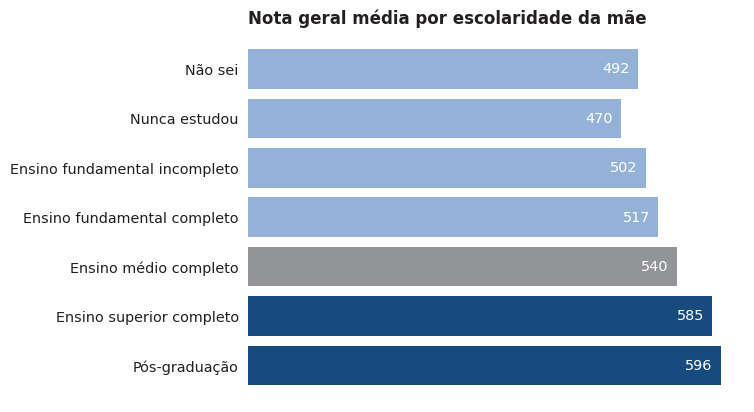

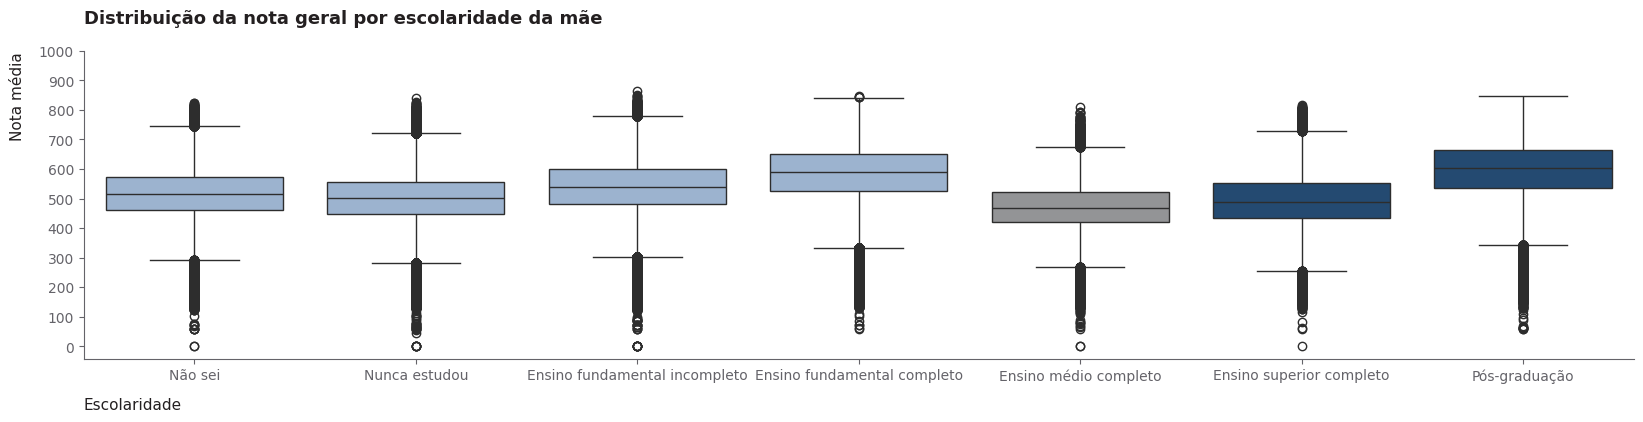

In [33]:
esc_mae_grade = performance_df.groupby(['escolaridade_mae'])[['nota_media']].mean().reset_index()
esc_mae_grade['order_escolaridade'] = esc_mae_grade['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_mae_grade = esc_mae_grade.sort_values(by=['order_escolaridade'], ascending=True)


barh_plot(esc_mae_grade, 'escolaridade_mae', 'nota_media',
          title='Nota geral média por escolaridade da mãe', ytick_range=range(len(esc_pai_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True, bar_color=[AZUL3]*4 + [CINZA7] + [AZUL1]*2)

bivariate_boxplot(performance_df, title='Distribuição da nota geral por escolaridade da mãe',  
                  xtick_labels=esc_mae_grade['escolaridade_mae'].unique().tolist(),
                  xlabel='Escolaridade', xtick_range=range(len(esc_mae_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL3]*4 + [CINZA7] + [AZUL1]*2, figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='escolaridade_mae')

* Claramente, quanto maior a escolaridade do pai ou da mãe, melhor o desempenho do candidato, apesar de haver outliers nas distribuições.

## De que forma a falta de recursos tecnológicos influenciam nas notas?

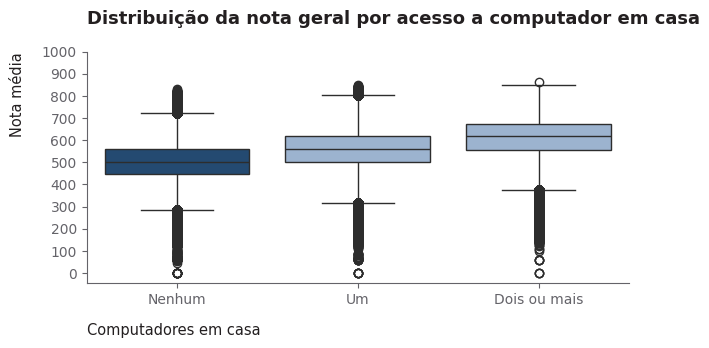

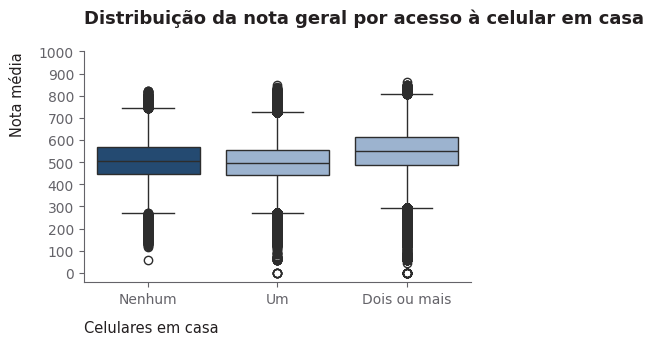

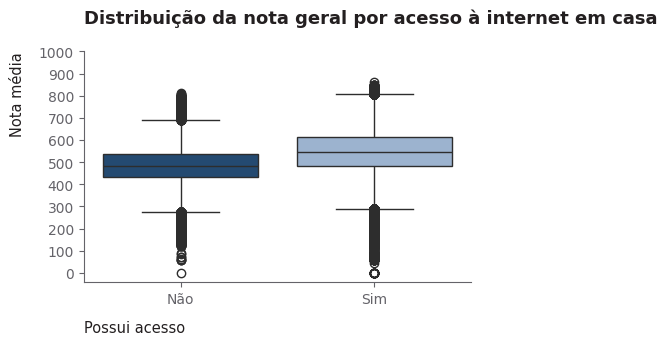

In [34]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por acesso a computador em casa', 
        xlabel='Computadores em casa', xtick_range=range(3), xtick_labels=['Nenhum', 'Um', 'Dois ou mais'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1, AZUL3, AZUL3], figsize=(7, 3), title_size=13, labelpad=12,
        label_size=10.5, tick_size=10, y='nota_media', x='possui_computador_em_casa', order=['Não', 'Um', 'Dois ou mais'], title_loc='left')

bivariate_boxplot(performance_df, title='Distribuição da nota geral por acesso à celular em casa', 
        xlabel='Celulares em casa', xtick_range=range(3), xtick_labels=['Nenhum', 'Um', 'Dois ou mais'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1, AZUL3, AZUL3], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='possui_celular_em_casa', order=['Não', 'Um', 'Dois ou mais'], title_loc='left')

bivariate_boxplot(performance_df, title='Distribuição da nota geral por acesso à internet em casa', 
        xlabel='Possui acesso', xtick_range=range(2), xtick_labels=['Não', 'Sim'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1, AZUL3, AZUL3], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='acesso_internet_em_casa', order=['Não', 'Sim'])

* Candidatos com um ou mais celulares em casa tendem a obter uma nota geral maior que aqueles que não possuem o dispositivo.
* Candidatos com um ou mais computadores em casa tendem a obter uma nota geral maior que aqueles que não possuem o dispositivo.
* Candidatos com acesso a internet em casa tendem a obter uma nota geral maior que aqueles que não possuem o recurso.

## De que forma o tipo de escolha (pública ou privada) influencia na nota?

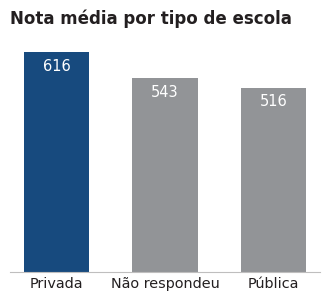

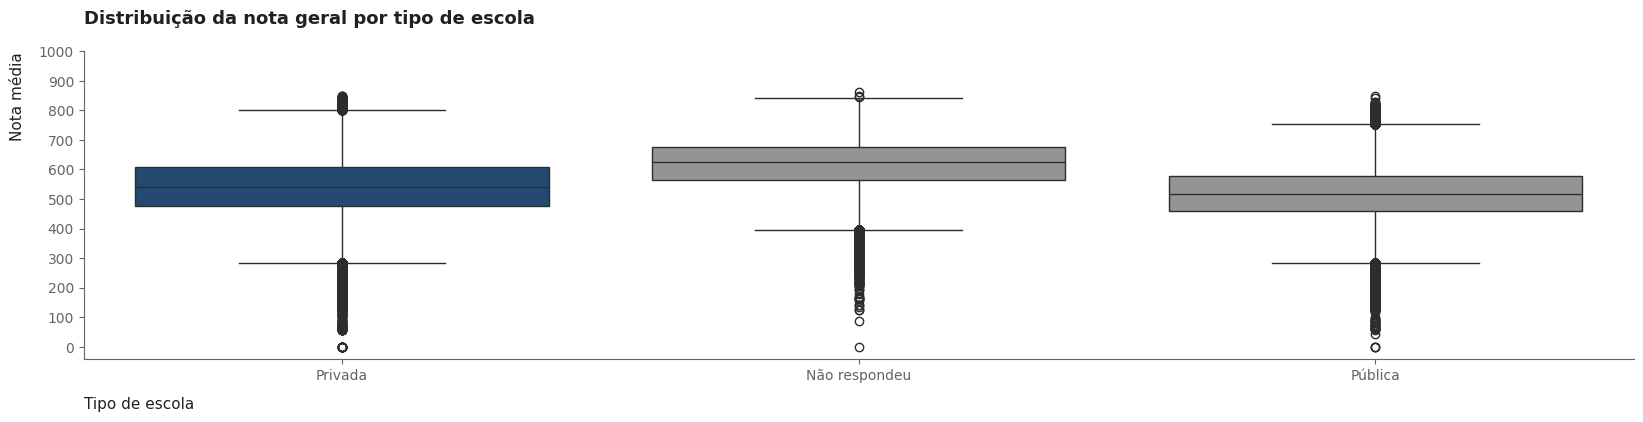

In [35]:
esc_grade = performance_df.groupby(['escola'])[['nota_media']].mean().reset_index()
esc_grade = esc_grade.sort_values(by=['nota_media'], ascending=False)

bar_plot(esc_grade, 'escola', 'nota_media', 
         title='Nota média por tipo de escola', xlabel='',
         figsize=(4, 3), top_annotation=False, title_pad=12,
         bar_color=[AZUL1, CINZA7, CINZA7], title_loc='left',
         mean=True)


bivariate_boxplot(performance_df, title='Distribuição da nota geral por tipo de escola',  
                  xtick_labels=esc_grade['escola'].unique().tolist(),
                  xlabel='Tipo de escola', xtick_range=range(len(esc_grade)),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[AZUL1, CINZA7, CINZA7], figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='escola')

* Em média, alunos de escola privada obtêm uma nota média 100 pontos acima que a de alunos de escola pública.


In [36]:
performance_df.groupby(['lingua'])[['nota_media']].mean().sort_values(by='nota_media', ascending=False)

,nota_media
lingua,
Inglês,564.022827
Espanhol,508.595703


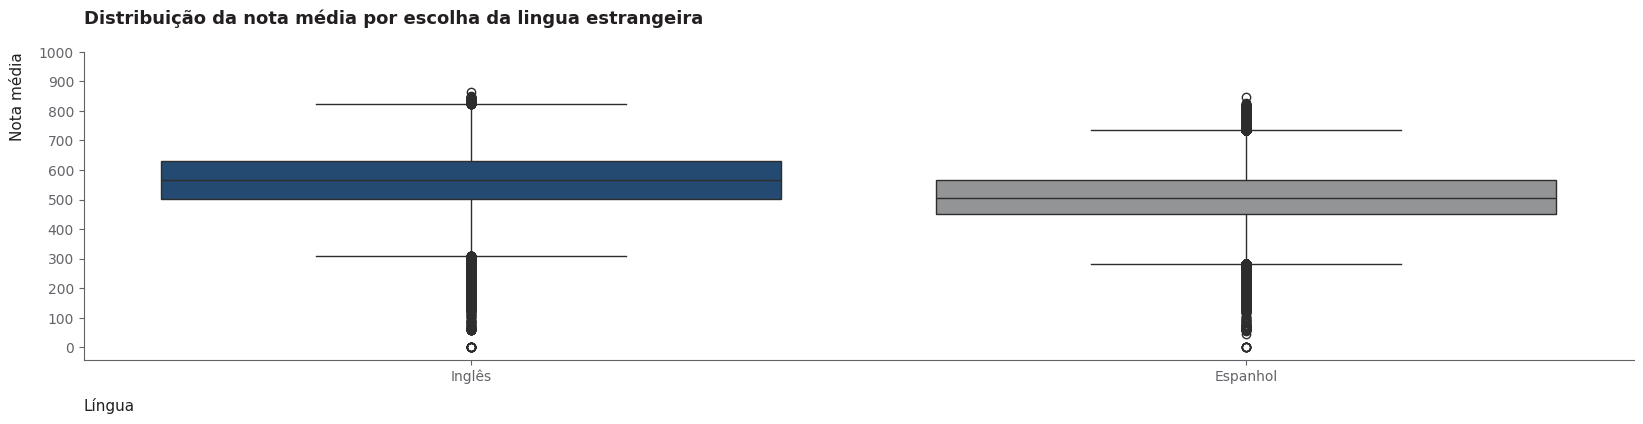

In [37]:
bivariate_boxplot(performance_df, title='Distribuição da nota média por escolha da lingua estrangeira',  
                  xtick_labels=['Inglês', 'Espanhol'],
                  xlabel='Língua', xtick_range=range(2),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[AZUL1, CINZA7, CINZA7], figsize=(20, 4), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='lingua', order=['Inglês', 'Espanhol'])

* Candidatos que escolhem inglês como língua estrangeira tendem a ter desempenho melhor.

In [38]:
performance_df['numero_pessoas_em_casa'] = pd.cut(performance_df['numero_pessoas_em_casa'],
                                            bins=[1, 3, 5, 10, 20],
                                            labels=['1 a 3', '4 a 5', '6 a 10', '11 a 20'], include_lowest=True)
performance_df.groupby(['numero_pessoas_em_casa'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
numero_pessoas_em_casa,
1 a 3,543.660522
4 a 5,542.911438
6 a 10,508.719635
11 a 20,484.996704


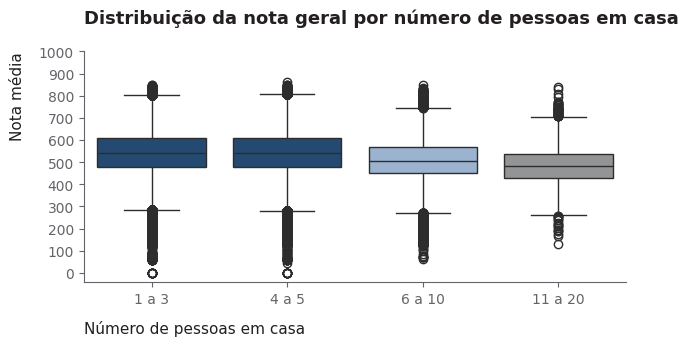

In [39]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por número de pessoas em casa',  
                  xtick_labels=['1 a 3', '4 a 5', '6 a 10', '11 a 20'],
                  xlabel='Número de pessoas em casa', xtick_range=range(4),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[AZUL1, AZUL1, AZUL3, CINZA7], figsize=(7, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='numero_pessoas_em_casa')

* Quanto maior o número de pessoas em casa, menor tende a ser a nota do candidato.

In [40]:
performance_df.groupby(['estado_civil'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
estado_civil,
Solteiro(a),542.970642
Não informado,524.986389
Divorciado(a)/Separado(a),510.822815
Casado(a)/União Estável,509.873474
Viúvo(a),474.827087


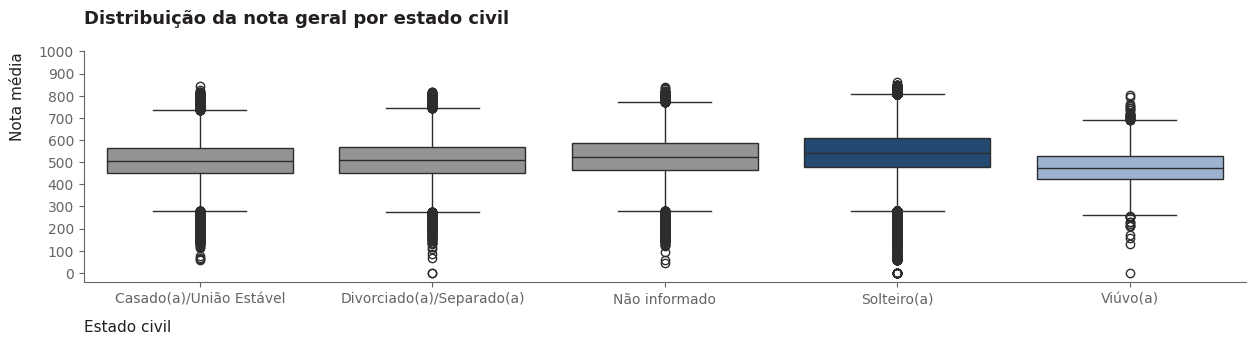

In [41]:

bivariate_boxplot(performance_df, title='Distribuição da nota geral por estado civil',  
                  xtick_labels=['Casado(a)/União Estável', 'Divorciado(a)/Separado(a)', 'Não informado', 'Solteiro(a)', 'Viúvo(a)'],
                  xlabel='Estado civil', xtick_range=range(5),
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[CINZA7, CINZA7, CINZA7, AZUL1, AZUL3], figsize=(15, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='estado_civil')

* Solteiros tendem a obter as melhores notas, enquanto viúvos as piores.

In [42]:
performance_df.groupby(['status_conclusao_ensino_medio'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False) 



,nota_media
status_conclusao_ensino_medio,
Concluído,544.189087
Cursando,541.036499
Último ano,536.914246
Não concluído,510.968384


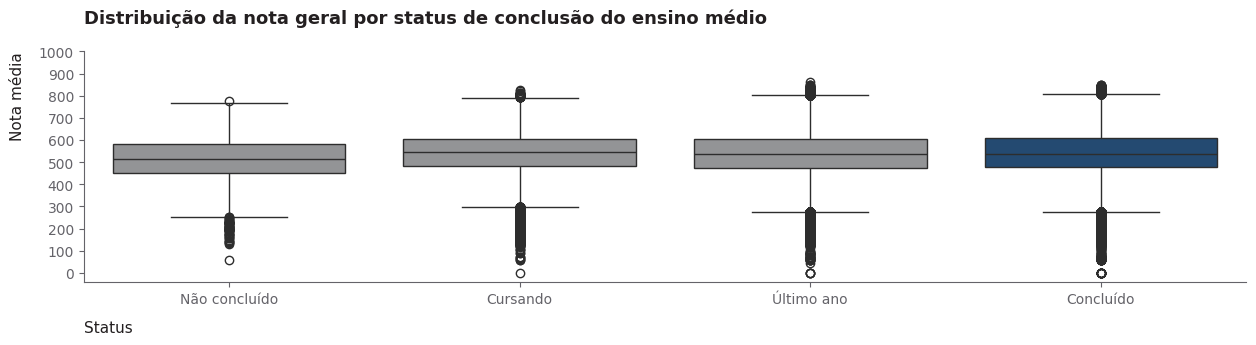

In [43]:
bivariate_boxplot(performance_df, title='Distribuição da nota geral por status de conclusão do ensino médio',  
                  xtick_labels=['Não concluído', 'Cursando', 'Último ano', 'Concluído'],
                  xlabel='Status', xtick_range=range(4), order=['Não concluído', 'Cursando', 'Último ano', 'Concluído'],
                  ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, 
                  boxplot_palette=[CINZA7, CINZA7, CINZA7, AZUL1, AZUL3], figsize=(15, 3), title_size=13, labelpad=10,
                  label_size=11, tick_size=10, y='nota_media', x='status_conclusao_ensino_medio')

* Em média, quanto maior o status, maior a nota do aluno.